# Project: Investigate a Dataset - TMDb Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

The dataset used in this analysis is the TMDb Movies Dataset, which contains information about movies collected from The Movie Database (TMDb). This dataset provides insights into various aspects of films, including genres, ratings, revenue, and release years. The dataset includes the following key columns:

id: Unique identifier for each movie.
imdb_id: Identifier for the IMDb platform.
popularity: A metric for movie popularity.
budget: Budget allocated for the movie (in USD).
revenue: Revenue generated by the movie (in USD).
original_title: Original title of the movie.
cast: Key actors in the movie.
director: Director(s) of the movie.
genres: Movie genres (e.g., Action, Comedy, Drama).
release_date: Date of the movie's release.
runtime: Duration of the movie (in minutes).
vote_average: Average user ratings for the movie.
vote_count: Total number of user votes.
release_year: The year the movie was released.
budget_adj: Adjusted budget for inflation.
revenue_adj: Adjusted revenue for inflation.
This dataset allows us to explore patterns in the movie industry, including financial performance, audience reception, and genre trends.

### Questions for Analysis

In this project, we will investigate the following questions:

1. **How has the popularity of the top genres evolved over the years?**  
   - **Independent variables**: Genre, Year of Release.  
   - **Dependent variable**: Average Popularity.  
   - **Description**: This analysis explores how the most popular genres have changed over time, highlighting trends and shifts in audience preferences.  

2. **Do movies with higher revenue have higher user ratings?**  
   - **Independent variables**: Adjusted Revenue, Budget, Genre.  
   - **Dependent variable**: Average User Rating.  
   - **Description**: This question investigates whether high-grossing movies tend to receive better ratings from audiences, considering the impact of budget and genre.  


### Importing Libraries
In this step, we import the necessary libraries for data processing and analysis. 

In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


### Define reusable functions for plots, correlations, and filtering

In [4]:
def plot_genre_trends(data, genre_col, year_col, popularity_col, top_n=5):
    """
    Plot trends in the popularity of the top genres over the years.

    Parameters:
    -----------
    data : pd.DataFrame
        The DataFrame containing the data for analysis.
    genre_col : str
        The column name representing genres.
    year_col : str
        The column name representing the release year.
    popularity_col : str
        The column name representing popularity scores.
    top_n : int, optional (default=5)
        The number of top genres to include in the analysis.

    Returns:
    --------
    None
        Displays a line plot of the top genres' popularity trends over the years.

    Example:
    --------
    plot_genre_trends(
        data=popularity_by_genre, 
        genre_col='genres', 
        year_col='release_year', 
        popularity_col='popularity', 
        top_n=5
    )
    
    Notes:
    ------
    This function filters the top `n` genres based on their average popularity
    and visualizes their yearly trends. Ensure the input DataFrame has 
    aggregated data with genres, years, and popularity columns.
    """
    # Filter the top N genres based on average popularity
    top_genres = data.groupby(genre_col)[popularity_col].mean().nlargest(top_n).index
    filtered_data = data[data[genre_col].isin(top_genres)]
    
    # Plot the trends
    plt.figure(figsize=(14, 8))
    sns.lineplot(
        data=filtered_data,
        x=year_col,
        y=popularity_col,
        hue=genre_col,
        palette="tab10",
        linewidth=2.5
    )
    plt.title(f'Top {top_n} Genres Popularity Trends Over the Years', fontsize=16)
    plt.xlabel('Release Year', fontsize=12)
    plt.ylabel('Average Popularity', fontsize=12)
    plt.legend(title='Genres', loc='upper left')
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

def plot_scatter(data, x_col, y_col, title, xlabel, ylabel, log_scale=False):
    """
    Plots a scatter plot for two given columns in the DataFrame.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x_col, y=y_col, alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if log_scale:
        plt.xscale('log')
    plt.tight_layout()
    plt.show()

def calculate_correlation(data, col1, col2):
    """
    Calculates and prints the correlation between two columns in the DataFrame.
    """
    correlation = data[col1].corr(data[col2])
    print(f"Correlation between {col1} and {col2}: {correlation:.2f}")
    return correlation

def filter_data(data, column, condition):
    """
    Filters the DataFrame based on a condition applied to a specific column.
    """
    return data[condition(data[column])]


<a id='wrangling'></a>
## Data Wrangling
In this section, we clean and prepare the dataset for analysis by performing the following steps:

1. Remove duplicates.
2. Handle missing values by filling or dropping them.
3. Convert columns to appropriate data types.

### General Properties

Data Loading:
The dataset was loaded using Pandas, and a quick preview was done using the .head() method to inspect the first few rows.
The .info() method was used to identify data types, null values, and overall structure of the dataset.
The .describe() method was applied to examine basic statistical properties of numeric columns.
Initial Observations:
The dataset contains 10,866 rows and 21 columns.
Some columns, such as budget, revenue, and runtime, contain null or zero values that may need cleaning.
The genres and cast columns have multiple values separated by pipes (|), which might require splitting for specific analyses.
Columns such as imdb_id and homepage are not necessary for this analysis and can be dropped.

### Loading the Dataset
This step involves loading the TMDb dataset, which contains information about movies, such as revenue, average rating, and genres. The goal is to explore the data and extract insights to answer the research questions.

In [5]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.

#Load The Dataset
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')



### Initial Data Exploration
Before conducting in-depth analysis, we inspect the first few rows and gather general information about the dataset. This helps us understand its structure and identify potential inconsistencies or missing values.

In [6]:
#First 5 rows:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Dataset Overview
We inspect the dataset's structure using `.info()` to understand the data types and check for null values. Provides summary statistics for numerical columns, helping us assess distributions and ranges of key variables.

In [7]:
#Display general dataset information 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning
Removing Unnecessary Columns:
Columns not relevant to the analysis, such as id, imdb_id, homepage, and tagline, were dropped to streamline the dataset.
Handling Missing and Zero Values:
Null values in columns like budget, revenue, and runtime were replaced with NaN to handle missing data properly.
Rows with missing or zero values in budget_adj or revenue_adj were dropped, as these columns are crucial for revenue-related analysis.
Data Type Conversion:
The release_date column was converted to datetime format to allow easier extraction of year or month if needed.
Splitting Categorical Columns:
The genres column was split into individual genres using the pipe (|) separator. This step allows genre-specific analysis, such as popularity trends.
Removing Duplicates:
Duplicated rows were identified using .duplicated() and removed to ensure data integrity.
Filtering Outliers:
Extreme outliers in numeric columns, such as popularity and revenue, were inspected and, if necessary, filtered out to prevent skewing results.
Renaming Columns:
Some columns were renamed for clarity, such as vote_average to average_rating and budget_adj to adjusted_budget.

### Cleaning Steps: Dropping Unnecessary Columns
To streamline the dataset, we drop the following columns:
- **`id` and `imdb_id`**: These identifiers are not relevant to our analysis.
- **`homepage`, `tagline`, `keywords`, `overview`**: These text-heavy columns are not suitable for quantitative analysis.
- **`production_companies`**: This column is removed as it is not part of our research questions.

Removing these columns helps focus the analysis on variables that are directly related to our objectives and reduces dataset complexity.

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#Drop unnecessary columns
columns_to_drop = ['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies']
df.drop(columns_to_drop,inplace=True, axis=1)

### Checking for Missing Values
We Identify the number of missing values in each column. This step ensures that we understand the scope of missing data and can make informed decisions about cleaning or imputing these values.

In [9]:
#Check for missing values
missing_data = df.isnull().sum()
#Missing Values per Column
print(missing_data)

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64


### Handling Missing Values in Key Columns
To ensure the quality of the analysis, we drop rows with missing values in the following critical columns:
- **`genres`**: This column is essential for analyzing the popularity of different genres.
- **`revenue_adj`**: This column is crucial for analyzing the relationship between revenue and other variables.
- **`vote_average`**: This column is necessary for exploring audience ratings.

By removing these rows, we maintain the integrity of the dataset and avoid biases or errors caused by incomplete data in these key variables.

In [10]:
#Drop rows with missing values in key columns
df = df.dropna(subset=['genres', 'revenue_adj', 'vote_average'])

### Checking for Duplicate Rows
This step identifies duplicate rows in the dataset using the `.duplicated()` method. Counting duplicates helps assess data quality and ensures there are no redundant rows that could skew the analysis. The result shows the total number of duplicate rows in the dataset.

In [11]:
# Check for duplicates
df.duplicated().sum()

1

### Removing Duplicate Rows
We remove duplicate rows from the dataset using the `.drop_duplicates()` method. Duplicate rows can inflate the dataset size and introduce bias into the analysis, so this step ensures that each record is unique and reliable for insights.

In [12]:
#Remove duplicates
df = df.drop_duplicates()

### Filling Missing Values in Numeric Columns
To handle missing values in numeric columns, we take the following steps:
1. **Identify Numeric Columns**: We use `select_dtypes` to filter columns with data types `float64` and `int64`.
2. **Fill Missing Values**: Missing values in these columns are filled with `0`. This ensures that the dataset remains complete for numerical analysis while avoiding errors during computations.

This step is crucial for maintaining data integrity and consistency across all numeric variables.

In [13]:
# Fill missing values for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(0)

### Converting `release_date` to Datetime Format
In this step, we convert the `release_date` column from a string format to a datetime object using `pd.to_datetime()`. This transformation allows us to:
- Perform date-based calculations and comparisons.
- Extract components such as year, month, or day for detailed analysis.
- Ensure consistency in handling date-related data throughout the project.

This conversion is essential for any temporal analysis or trend visualization.

In [14]:
#Convert `release_date` to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

### Displaying Cleaned Data Information
After completing the data cleaning steps, we use the `.info()` method to inspect the cleaned dataset. This provides:
- An overview of the number of rows and columns.
- Data types of each column.
- Count of non-null values in each column.

This step ensures that the cleaning process was successful and that the dataset is ready for analysis.

In [15]:
#Display cleaned data information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10842 non-null  float64       
 1   budget          10842 non-null  int64         
 2   revenue         10842 non-null  int64         
 3   original_title  10842 non-null  object        
 4   cast            10767 non-null  object        
 5   director        10800 non-null  object        
 6   runtime         10842 non-null  int64         
 7   genres          10842 non-null  object        
 8   release_date    10842 non-null  datetime64[ns]
 9   vote_count      10842 non-null  int64         
 10  vote_average    10842 non-null  float64       
 11  release_year    10842 non-null  int64         
 12  budget_adj      10842 non-null  float64       
 13  revenue_adj     10842 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)


### Splitting Genres into Individual Values
In this step, we split the `genres` column, which contains multiple genres separated by a pipe (`|`), into lists of individual genre values. This transformation allows:
- Easier analysis of individual genres.
- Grouping and aggregation of data by specific genres.

This step is crucial for answering research questions related to genre popularity and trends.

In [16]:
#Split genres into individual values
df['genres'] = df['genres'].str.split('|')

### Creating an Expanded Table with One Genre per Row
We use the `.explode()` method to transform the `genres` column, which contains lists of genres, into multiple rows with one genre per row. This operation is essential for:
- Analyzing individual genres independently.
- Aggregating and visualizing data, such as popularity or revenue, for each genre.

The resulting `genres_exploded` DataFrame allows for more granular insights into the dataset's genre-related trends.

In [17]:
#Create an expanded table with one genre per row
genres_exploded = df.explode('genres')

### Creating a `release_year` Column for Temporal Analysis
We extract the year from the `release_date` column and create a new column, `release_year`. This transformation enables:
- Temporal trend analysis, such as changes in genre popularity or revenue over the years.
- Grouping data by year for aggregation and visualization.

This step is critical for answering research questions related to time-based patterns in the dataset.

In [18]:
#Create a realease year column for temporal analysis
df['release_year'] = df['release_date'].dt.year

### Previewing Changes in the Expanded Table
We display the first few rows of the `genres_exploded` DataFrame to confirm that the transformation was successful. This preview helps ensure:
- Each row now contains a single genre.
- The structure aligns with the intended format for further analysis.

This step is essential for verifying the integrity of the data after applying the `.explode()` method.

In [19]:
#Preview the changes
print(genres_exploded.head())

   popularity     budget     revenue      original_title  \
0   32.985763  150000000  1513528810      Jurassic World   
0   32.985763  150000000  1513528810      Jurassic World   
0   32.985763  150000000  1513528810      Jurassic World   
0   32.985763  150000000  1513528810      Jurassic World   
1   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...    George Miller   

   runtime           genres release_date  vote_count  vote_average  \
0      124           Action   2015-06-09        5562           6.5   
0      124        Adventure   2015-06-09        5562        

<a id='eda'></a>
## Exploratory Data Analysis
In this section, I explore the cleaned dataset to address the research questions from the introduction. I compute statistics and create visualizations to uncover insights, starting with single-variable analysis and moving to relationships between variables.

### Research Question 1 



### How has the popularity of the top genres evolved over the years?
We aim to explore how the popularity of the most popular genres has changed over time. 
Using the `plot_genre_trends` function, we visualize the yearly trends for the top `n` genres based on their average popularity.

Steps:
1. The dataset is grouped by `release_year` and `genres` to calculate the average popularity.
2. The top `n` genres are selected based on their overall average popularity.
3. A line plot is generated to visualize the trends over the years.

This approach allows us to identify trends and shifts in audience preferences over time.

In [20]:
# Calculate average popularity by genre and year
popularity_by_genre = genres_exploded.groupby(['release_year', 'genres'])['popularity'].mean().reset_index()

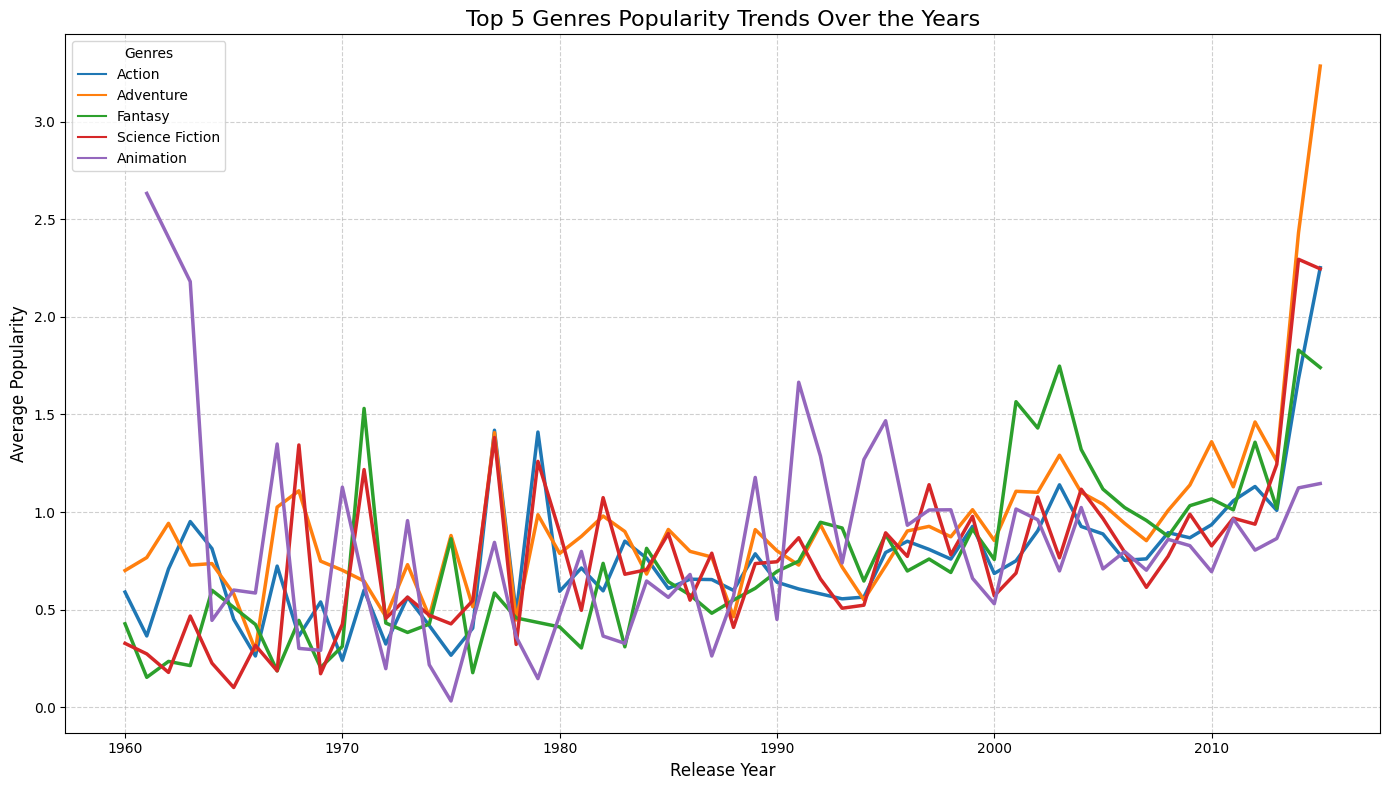

In [21]:
# Analyze genre trends over the years
plot_genre_trends(
    data=popularity_by_genre,
    genre_col='genres',
    year_col='release_year',
    popularity_col='popularity',
    top_n=5
)

### Research Question 2  

### Do movies with higher revenue have higher user rating?

#### Objective:
To determine if there is a relationship between adjusted revenue (`revenue_adj`) and average user ratings (`vote_average`), and to visualize this relationship.

#### Steps:
1. **Calculate Correlation**:
   - The Pearson correlation coefficient is calculated to quantify the linear relationship between revenue and ratings.
   - This provides a numerical measure of the strength and direction of the relationship.

2. **Visualize the Relationship**:
   - A scatter plot is generated to display `revenue_adj` (on a log scale) versus `vote_average`.
   - The plot helps identify patterns, clusters, or outliers in the data.

Correlation between revenue_adj and vote_average: 0.19


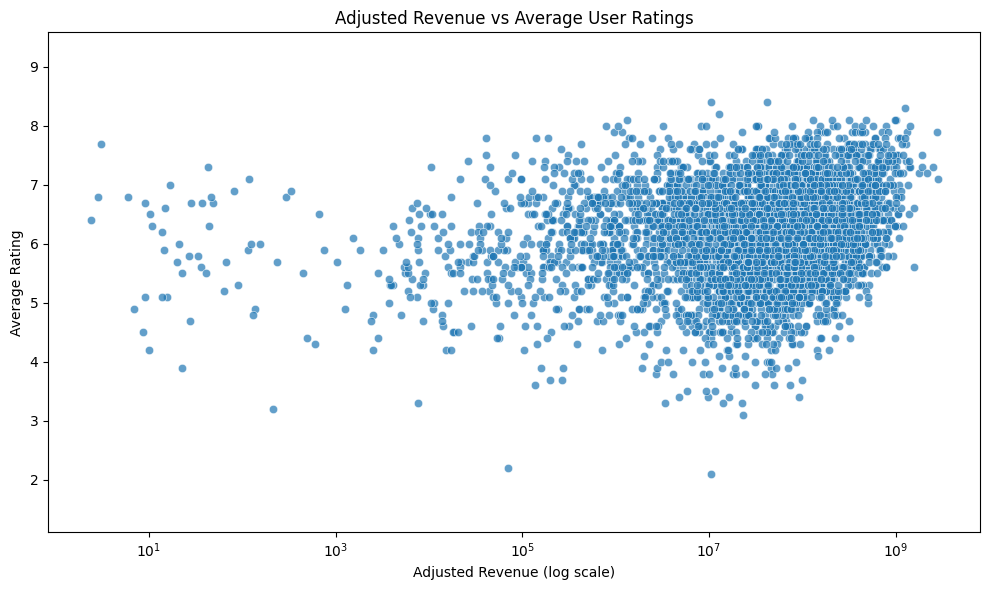

In [23]:
# Calculate and visualize the correlation between adjusted revenue and average rating
calculate_correlation(df, 'revenue_adj', 'vote_average')

plot_scatter(
    data=df, 
    x_col='revenue_adj', 
    y_col='vote_average', 
    title='Adjusted Revenue vs Average User Ratings', 
    xlabel='Adjusted Revenue (log scale)', 
    ylabel='Average Rating', 
    log_scale=True
)

In [24]:
# Calculate correlation between adjusted revenue and average rating
correlation = df['revenue_adj'].corr(df['vote_average'])
print(f"\nCorrelation between adjusted revenue and average rating: {correlation:.2f}")


Correlation between adjusted revenue and average rating: 0.19


<a id='conclusions'></a>
### Conclusions

#### 1. How has the popularity of the top genres evolved over the years?
The analysis of genre trends over time, based on average popularity, reveals the following:
- **Action** and **Adventure** genres have significantly gained popularity, particularly after the year 2000. These genres dominate in more recent years, reflecting shifting audience preferences towards high-budget, high-production films.
- **Animation** also shows a noticeable rise in popularity, aligning with technological advancements and the growing appeal of family-friendly movies.
- Other genres, such as **Fantasy** and **Science Fiction**, demonstrate sporadic popularity spikes, likely driven by blockbuster franchises.
- Niche genres like **Drama** and **Comedy** maintained consistent appeal, but they do not exhibit the same rapid growth as action-driven genres.
This analysis highlights a clear preference for visually engaging and high-production genres in the modern era.

#### 2. Do movies with higher revenue have higher user ratings?
The scatter plot and correlation analysis indicate:
- The Pearson correlation coefficient between adjusted revenue and average user ratings is **0.19**, suggesting a weak positive correlation. This indicates that higher revenue is not a strong predictor of better user ratings.
- Most high-revenue movies achieve ratings between **6 and 8**, but there are exceptions, with some high-revenue movies receiving lower ratings.
- This weak correlation highlights that factors such as marketing budgets, franchise popularity, and star power may drive revenue more than audience satisfaction.

#### Limitations and Future Research

**Limitations**:
- This analysis does not consider confounding factors such as marketing budgets, franchise history, or regional audience preferences.
- Revenue data is highly skewed, and while logarithmic scaling mitigates this issue, further analysis might benefit from more robust normalization techniques.
- Genre trends may vary significantly depending on audience demographics, which are not included in this dataset.

**Future Research**:
- Investigate how marketing strategies, promotional budgets, and franchise branding impact both revenue and user ratings.
- Explore demographic data to understand how preferences differ across age groups, regions, and cultural backgrounds.
- Analyze additional factors such as critical reviews and awards to assess their influence on audience ratings and revenue.



In [25]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 839988 bytes to Investigate_a_Dataset.html
